In [ ]:
#Exercise 1

# What linear regression equation best predicts statistics performance for the students assuming we have following data?

# Simple linear regression fits the best according the data given. Due to it having independent and dependent variables.

# If a student made an 80 on the test, what grade would we expect him to make in statistics?

# We can find out by using the linear regression equation, y = b0 + b1x. We need to first find b1 then b0. To get b0 is the division between the sigma of the product between the difference of 
# xi and the mean of x and the difference of yi and the mean of y with the squared of the difference between x and the mean of x which is 470/730 or 0.644. Then to get b0 we refer to the previous formula
# y = b0 + b1x and we will get 26.768. After we get both b0 and b1 value we can get the expected grade in the statistics grade which is 78.288.

# How well does the regression equation fit the data?

# Equation works well with the table, based on the number returned by the linear regression equation, which is close to the table value.

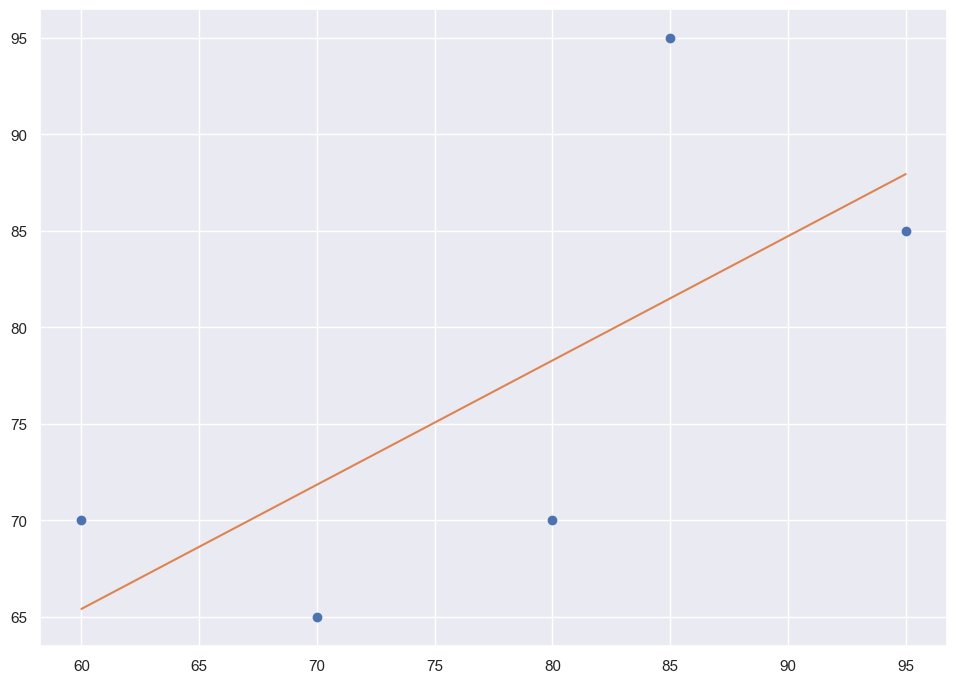

In [45]:
#Exercise 2
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

studentScore = pd.read_csv('Dataset student_score.csv')

xvalue = studentScore.Xi
yvalue = studentScore.Yi

plt.plot(xvalue, yvalue, 'o')
m, b = np.polyfit(xvalue, yvalue, 1)
plt.plot(xvalue, m*xvalue+b)


#### 

In [43]:
#Exercise 3

import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

studentScore = pd.read_csv('Dataset student_score.csv')

xvalue = studentScore.Xi
yvalue = studentScore.Yi

x = np.array(xvalue).reshape(-1,1)
y = np.array(yvalue).reshape(-1,1)

reg = LinearRegression().fit(x, y)

r_squared = reg.score(x, y)

print("R-squared value:", r_squared)

y_pred = reg.predict(x)

mse = mean_squared_error(y, y_pred)

rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

baseline = np.var(y)

print("Baseline:", baseline)




R-squared value: 0.4803218090889325
Mean Squared Error: 65.4794520547945
Root Mean Squared Error: 8.09193747224943
Baseline: 126.0


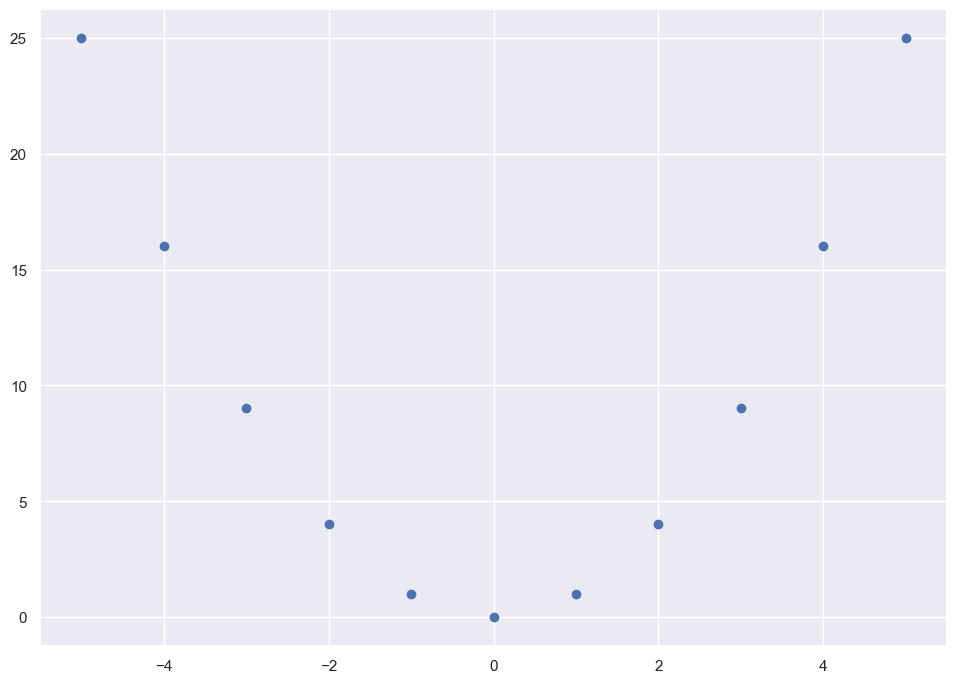

In [44]:
#Exercise-4, 3.1
import matplotlib.pyplot as plt
import numpy as np

y=[16,4,1,9,1,25,16,4,0,9,25]
x=[-4,-2,1,3,-1,-5,4,2,0,-3,5]

plot=plt.scatter(x,y)

plt.show(plot)


In [ ]:
#3.2
The regression model above is second degree polynomial

The model performance
----------------------
Linear Mse is 0.880318861876837
Logistic Mse is 1.5081967213114753
Linear Regression R-squared score is 0.29
Logistic Regression R-squared score is 0.66




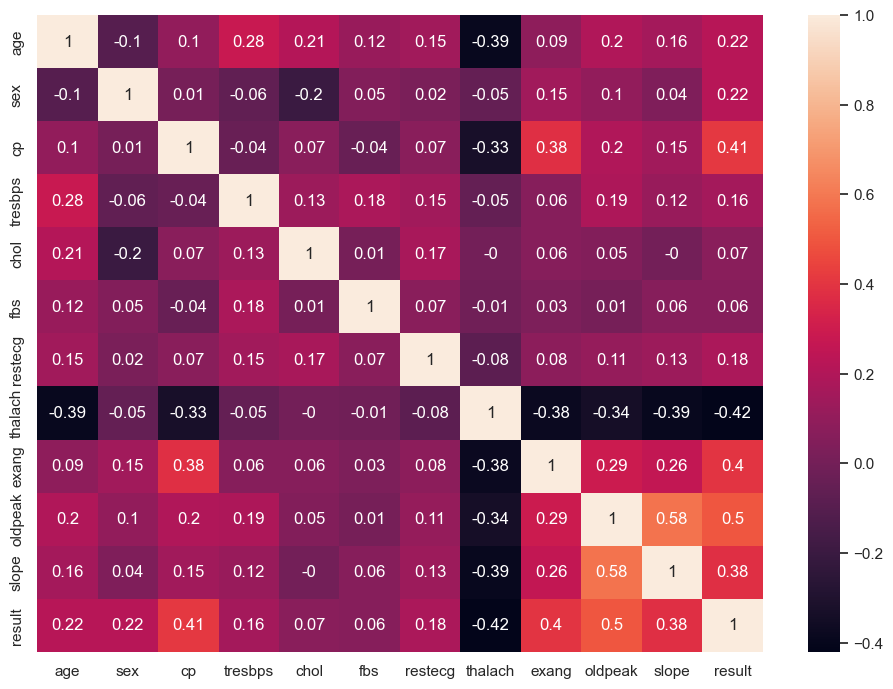

In [2]:
# Exercise 5

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("heart.csv")

#check for null values
#data.isnull().sum()

#generating heatmap to determine independent and dependent variables and the correlation between them
correlation = data.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation, annot=True)

#Based on heatmap, input data oldpeak has more effect on output result
#heatmap shows correlation is strong between oldpeak ("ST depression induced by exercise relative to rest") and result (diagnosis of heart disease)
#let x be oldpeak and y be result, as explained above
X_oldpeak = data.oldpeak
Y_result = data.result

#normalize x and y between -1 and 1
X_oldpeak = np.array(X_oldpeak).reshape(-1,1)
Y_result = np.array(Y_result).reshape(-1,1)

#let 80% of data be for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_oldpeak,Y_result, test_size=0.2,  random_state=5) 

#creating the linear regression model and inputting the training data
linreg = linear_model.LinearRegression()
linreg.fit(X_train, Y_train)

#the prediction test x values with linear regression
prediction = linreg.predict(X_test)

#measuring performance with performance metrics
mse = mean_squared_error(Y_test, prediction)
r = round(linreg.score(X_test, Y_test),2)


#analysing the non-linear logistic regression
nonlr = linear_model.LogisticRegression(max_iter=10000)
nonlr.fit(X_train, Y_train.ravel())

non_linPrediction = nonlr.predict(X_test)

#measuring performance with performance metrics of the non-linear regression
msenl = mean_squared_error(Y_test, non_linPrediction)
rnl = round(nonlr.score(X_test, Y_test),2)

print("The model performance")
print("----------------------")
print('Linear Mse is {}'.format(mse))
print('Logistic Mse is {}'.format(msenl))
print('Linear Regression R-squared score is {}'.format(r))
print('Logistic Regression R-squared score is {}'.format(rnl))
print("\n")

#The mse for the logistic regression is higher than that of linear regression. 
#However, the R-squared of the logistic regression is a higher than R-squared of the linear regression
#Which could mean that the logistic regression model fits the data more effectively 